In [1]:
import pandas as pd

### Connect to WRDS

In [2]:
import wrds
db = wrds.Connection()

Enter your WRDS username [jorda]:jordandpflum
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


### Daily Security Information (Daily)

In [3]:
# Don't run - too slow
'''
sql_query = """
-- Name History Table
SELECT
    crsp.saz_dp_dly.KYPERMNO,
    crsp.saz_dp_dly.CALDT,
    crsp.saz_dp_dly.PRC,
    crsp.saz_dp_dly.RET,
    crsp.saz_dp_dly.RETX,
    crsp.saz_dp_dly.TCAP,
    crsp.saz_dp_dly.VOL
FROM 
    crsp.saz_dp_dly
WHERE
    crsp.saz_dp_dly.CALDT >= '2010-01-01'
"""
dailySecurityInfo = db.raw_sql(sql_query)
dailySecurityInfo.head()
'''

'\nsql_query = """\n-- Name History Table\nSELECT\n    crsp.saz_dp_dly.KYPERMNO,\n    crsp.saz_dp_dly.CALDT,\n    crsp.saz_dp_dly.PRC,\n    crsp.saz_dp_dly.RET,\n    crsp.saz_dp_dly.RETX,\n    crsp.saz_dp_dly.TCAP,\n    crsp.saz_dp_dly.VOL\nFROM \n    crsp.saz_dp_dly\nWHERE\n    crsp.saz_dp_dly.CALDT >= \'2010-01-01\'\n"""\ndailySecurityInfo = db.raw_sql(sql_query)\ndailySecurityInfo.head()\n'

### Daily Security Information (Monthly)

Still need to adjust prices!!

In [99]:
sql_query = """
-- Name History Table
SELECT
    crsp.saz_mth.KYPERMNO, --PERMNO
    crsp.saz_mth.MCALDT, --DATE
    crsp.saz_hdr.HCOMNAM, --COMPANY NAME
    crsp.saz_hdr.HTICK, --TICKER
    crsp.saz_mth.MTCAP, -- MARKET CAP (END OF PERIOD)
    --crsp.saz_mth.MPRC / crsp.saz_dis.FACPR, --Adjusted PRICE
    crsp.saz_mth.MRET -- RETURN
FROM 
    crsp.saz_mth
INNER JOIN
    crsp.saz_hdr
ON
    crsp.saz_mth.KYPERMNO = crsp.saz_hdr.KYPERMNO
--INNER JOIN
--    crsp.saz_dis 
--ON
--    crsp.saz_mth.KYPERMNO = crsp.saz_dis.KYPERMNO
WHERE
    crsp.saz_mth.MCALDT >= '2010-01-01' AND
    crsp.saz_mth.MCALDT <= '2019-01-01' AND
    (
    crsp.saz_hdr.HSHRCD = 10 OR
    crsp.saz_hdr.HSHRCD = 11 OR
    crsp.saz_hdr.HSHRCD = 18
    ) AND
    crsp.saz_mth.MTCAP >= 10000000
"""
monthlySecurityInfo = db.raw_sql(sql_query)
monthlySecurityInfo.head()

,kypermno,mcaldt,hcomnam,htick,mtcap,mret
0,10104.0,2012-11-30,ORACLE CORP,ORCL,1.527669e+08,0.035232
1,10104.0,2017-09-29,ORACLE CORP,ORCL,2.017880e+08,-0.039340
2,10104.0,2017-10-31,ORACLE CORP,ORCL,2.124304e+08,0.056670
3,10104.0,2017-11-30,ORACLE CORP,ORCL,2.047512e+08,-0.036149
4,10104.0,2017-12-29,ORACLE CORP,ORCL,1.957204e+08,-0.036282


In [100]:

print(len(monthlySecurityInfo[monthlySecurityInfo['mret'].notnull()]))
print(len(monthlySecurityInfo['kypermno'].unique()))

39056
667


In [107]:
testDF = pd.DataFrame(columns=monthlySecurityInfo['kypermno'].unique(), 
                      index=pd.Series(monthlySecurityInfo['mcaldt'].unique()).sort_values(ascending=True)
                     )

testDF = pd.DataFrame(index=pd.Series(monthlySecurityInfo['mcaldt'].unique()).sort_values(ascending=True))
securities = monthlySecurityInfo['kypermno'].unique()
numSecurities = len(securities)
for i, security in enumerate(securities):
    #securityReturns = pd.DataFrame(monthlySecurityInfo[monthlySecurityInfo['kypermno']==security][['mcaldt','mret']]).set_index('mcaldt')
    #testDF = testDF.merge(securityReturns, left_index=True, right_index=True)
    #testDF[security] = monthlySecurityInfo[monthlySecurityInfo['kypermno']==security]['mret']
    securityReturns = pd.DataFrame(monthlySecurityInfo[monthlySecurityInfo['kypermno']==security][['mcaldt','mret']]).set_index('mcaldt').rename(columns={'mret':security})
    securityReturns = securityReturns
    testDF = pd.concat([testDF, securityReturns], axis=1)
    if (i % 10) == 0:
        print(i/numSecurities, ' Percent Done')
    #print(len(testDF[testDF[security].notnull()]))

0.0  Percent Done
0.014992503748125937  Percent Done
0.029985007496251874  Percent Done
0.044977511244377814  Percent Done
0.05997001499250375  Percent Done
0.07496251874062969  Percent Done
0.08995502248875563  Percent Done
0.10494752623688156  Percent Done
0.1199400299850075  Percent Done
0.13493253373313344  Percent Done
0.14992503748125938  Percent Done
0.16491754122938532  Percent Done
0.17991004497751126  Percent Done
0.19490254872563717  Percent Done
0.2098950524737631  Percent Done
0.22488755622188905  Percent Done
0.239880059970015  Percent Done
0.25487256371814093  Percent Done
0.2698650674662669  Percent Done
0.2848575712143928  Percent Done
0.29985007496251875  Percent Done
0.3148425787106447  Percent Done
0.32983508245877063  Percent Done
0.3448275862068966  Percent Done
0.3598200899550225  Percent Done
0.3748125937031484  Percent Done
0.38980509745127434  Percent Done
0.4047976011994003  Percent Done
0.4197901049475262  Percent Done
0.43478260869565216  Percent Done
0.449

In [108]:
testDF = testDF.dropna(axis=1)

In [102]:
testDF.head()

,10104.0,10107.0,10138.0,10145.0,10225.0,10147.0,10516.0,10299.0,10324.0,10696.0,...,93002.0,92988.0,93096.0,93101.0,93132.0,93429.0,93436.0,93150.0,93152.0,93312.0
2010-01-29,-0.057888,-0.075459,-0.068169,-0.014286,NaN,-0.045793,-0.042798,NaN,0.107121,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-26,0.068951,0.022001,0.021564,0.047166,NaN,0.049190,-0.015349,NaN,0.054184,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,0.043002,0.021538,0.089761,0.127241,NaN,0.031447,-0.015668,NaN,-0.093881,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-30,0.008071,0.042595,0.046753,0.048597,NaN,0.053769,-0.033218,NaN,0.026818,NaN,...,NaN,NaN,0.131485,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-28,-0.127477,-0.150811,-0.139381,-0.092637,NaN,-0.020515,-0.090193,NaN,-0.085870,NaN,...,NaN,NaN,0.058103,NaN,NaN,NaN,NaN,NaN,NaN,NaN


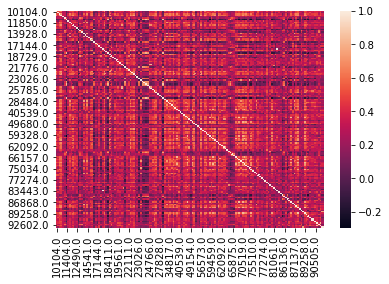

In [111]:
#testDF = testDF.fillna(0)
corrMatrix = testDF.corr()
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrMatrix)
plt.show()

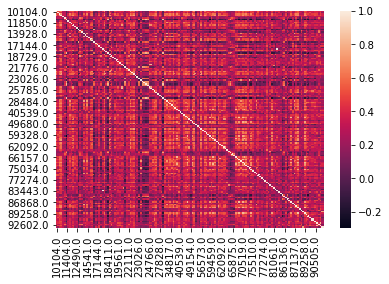

In [110]:
testDF = testDF.fillna(0)
corrMatrix = testDF.corr()
import seaborn as sn
import matplotlib.pyplot as plt
sn.heatmap(corrMatrix)
plt.show()

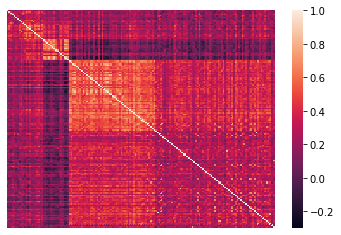

In [162]:
import scipy
import scipy.cluster.hierarchy as sch
import numpy as np

def cluster_corr(corr_array, inplace=False):
    """
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array, metric='euclidean') # Look into 'seuclidean', standardized euclidean
    linkage = sch.linkage(pairwise_distances, method='complete') # Look into 'ward' - ward variance minimization algorithim
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

sn.heatmap(cluster_corr(corrMatrix), xticklabels=False, yticklabels=False)



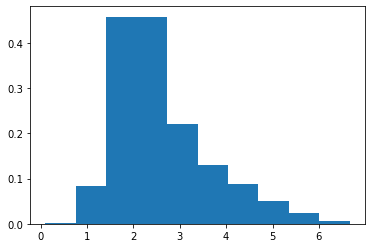

In [144]:
import matplotlib.pyplot as plt
pairwise_distances = sch.distance.pdist(cluster_corr(corrMatrix))
plt.hist(pairwise_distances,density=True)
plt.show()

In [38]:
pd.DataFrame(monthlySecurityInfo[monthlySecurityInfo['kypermno']==10051.0][['mcaldt','mret']]).set_index('mcaldt')

,mret
mcaldt,
2018-01-31,NaN
2018-02-28,NaN
2018-03-29,NaN
2018-04-30,NaN
2018-05-31,NaN
2018-06-29,NaN
2018-07-31,NaN
2018-08-31,NaN
2018-09-28,NaN
